# Problem Set 2

Note: since all of you guys are using Python and Jupyter notebook, this problem set is to get yourselves more familiar with Python programming.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Q1: Net Present Value

If an asset pays a stream of payoffs over multiple time periods, then we
can use a discount rate to calculate the value to the consumer of a entire
sequence of payoffs.

Most generally, we enumerate each discrete time period (e.g. year, month, day) by
the index $ t $ where today is $ t=0 $ and the asset lives for $ T $
periods, or infinite periods.

List the payoff at each time period as $ y_t $,  which we will assume, for
now, is known in advance.

Then if the discount factor is $ r \geq 0 $, the consumer “values” the
payoff $ y_t $ delivered at time $ t $ as $ \frac{1}{(1+r)^t}y_t $
where we note that if $ t=0 $, the value is just the current payoff
$ y_0 $.

Using this logic, we can write an expression for the value of the entire
sequence of payoffs with a sum.


$$
P_0 = \sum_{t=0}^T \left(\frac{1}{1 + r}\right)^t y_t
$$

For the rest of the example, we assume $r=0.01$.

In [2]:
r = 0.01

### Q1.1
Suppose we have a stock that distributes 1 dollar dividend for every 3 periods (0, 3, 6, 9, ...) up to $T=500$, what's the NPV of it?

In [3]:
npv = 0
T = 500

for i in range(T + 1):
    if (i % 3 == 0):
        npv += 1 / ((1 + r) ** i)

print(f"The NPV is {npv}")

The NPV is 33.769670491319275


### Q1.2
Suppose we have a stock that distributes 1 dollar dividend for every even period (0, 2, 4, 6, ...) and distributes 0.8 dollar dividend for every odd period (1, 3, 5, 7, ...) up to $T=500$, what's the NPV of it?

In [4]:
npv = 0
T = 500

for i in range(T + 1):
    if (i % 2 == 0):
        npv += 1 / ((1 + r) ** i)
    else:
        npv += 0.8 / ((1 + r) ** i)

print(f"The NPV is {npv}")

The NPV is 90.32892855045895


### Q1.3
Suppose there's an investment possibility. We can choose 1) to invest 5 dollar for all $t=0,1,\ldots,100$, and receive 1 dollar for all $t = 101, 102, \ldots, 500$, or 2) just walk away. Which option should we choose? Should we take this opportunity?

In [5]:
npv = 0
T = 500

for i in range(T + 1):
    if (i <= 100):
        npv -= 5 / ((1 + r) ** i)
    else:
        npv += 1 / ((1 + r) ** i)

print(f"The NPV is {npv}")

The NPV is -283.8640102206571


Since the NPV is negative, the investment option is not good enough and we just walk away.

### Q1.4
Suppose we have a stock that distribute some dividend that geometrically decays with $\delta = 0.8$, i.e., it pays back 1 dollar at period 0, 0.8 dollar at period 1, 0.64 dollar at period 2, ... up to $T=500$, what's the NPV?

In [6]:
npv = 0
T = 500

cur_div = 1
for i in range(T + 1):
    npv += cur_div / ((1 + r) ** i)
    cur_div *= 0.8

print(f"The NPV is {npv}")

The NPV is 4.809523809523807


## Q2: Transition Dynamics of a Markov Process
We continue what we did in PS1, and think about a sudden, permanent change in the transition matrix. This can be treated as an exogenous policy change from the government.

The Markov matrix that we had in PS1 was

$$
P_1 = \left(\begin{array}{ccc}
1-\alpha-\beta & \alpha & \beta\\
\gamma & 1-\gamma & 0\\
\delta & \epsilon & 1-\delta-\epsilon
\end{array}\right)
$$

where $\alpha = 0.4, \beta = 0.1, \gamma = 0.2, \delta = 0.1, \epsilon = 0.001$. Now, we consider a government policy that's going to provide some funding for free job training classes, hence the probability that Unemployed become Employed would increase to $\alpha = 0.5$. However, to finance this policy, the government have to increase the tax rate of the firms, which increases job firing, and the probability that Employed guys become Unemployed is now $\gamma = 0.3$.

### Q2.1
Formulate the new transition matrix $P_2$ after the policy change.

In [10]:
alpha = 0.4
beta = 0.1
gamma = 0.2
epsilon = 0.001
delta = 0.1

# Construct the Markov matrix
P1 = np.zeros((3, 3))
P1[0, :] = [1 - alpha - beta, alpha, beta]
P1[1, :] = [gamma, 1 - gamma, 0]
P1[2, :] = [delta, epsilon, 1 - delta - epsilon]

# Construct the new matrix
gamma = 0.3
alpha = 0.5
P2 = np.zeros((3, 3))
P2[0, :] = [1 - alpha - beta, alpha, beta]
P2[1, :] = [gamma, 1 - gamma, 0]
P2[2, :] = [delta, epsilon, 1 - delta - epsilon]

### Q2.2
Compute the old stationary distribution and the new stationary distribution, denoted as $\psi_{1}$ and $\psi_{2}$. What do you find?

In [11]:
def stationary_distribution(P):
    # Compute the stationary distribution
    w, v = np.linalg.eig(P.T)
    tmp = v[:, np.isclose(w, 1)][:, 0]
    sta_dist = tmp / np.sum(tmp)
    return sta_dist

psi_1 = stationary_distribution(P1)
psi_2 = stationary_distribution(P2)
print(psi_1)
print(psi_2)

[0.25030979 0.50185874 0.24783147]
[0.27321912 0.45626691 0.27051398]


### Q2.3
Assume the economy starts at the previous stationary distribution $\psi_{1}$. Time period is discrete and it starts from 0. Suppose the government policy takes place at period 4, i.e., the transitions between 0-1, 1-2, 2-3, 3-4 follow $P_{1}$, and the transition follows $P_{2}$ afterwards.

Plot the evolution of these three states for $t=1, 2, \ldots, 40$

In [12]:
def Markov_simulation_dist(P, ini_dist, T):
    n = len(ini_dist)
    res = np.zeros((T, n)) # initialize the result
    res[0, :] = ini_dist # starting point
    for i in range(T - 1):
        res[i + 1, :] = res[i, :] @ P
        
    return res

In [18]:
res = Markov_simulation_dist(P2, psi_1, 36)
res_extended = np.zeros((40, 3))
res_extended[4:, :] = res
for i in range(4):
    res_extended[i, :] = psi_1

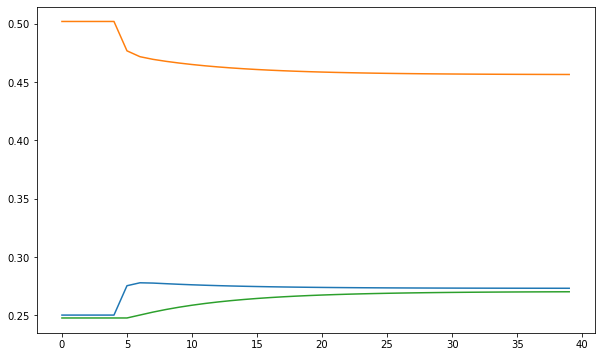

In [20]:
plt.figure(figsize = (10, 6))
plt.plot(res_extended)